# how method 1 generate synthetic samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def show(r ,degree,density,d=2) :
# Example values
    A = np.array([0, 0])  # Point A
    B = np.array([10, 10])  # Point B
    plot_oversampling(A, B, density, d, r, degree)
def generate_samples(space_point, d, density, r, degree):
    s = space_point + np.random.uniform(-1, 1, (density, d)) * r * degree
    return s

def plot_oversampling(A, B, density, d, r, degree):
    # Calculate midpoints
    midpoint = (A + B) / 2
    left_mid = A + (midpoint - A) / 2
    right_mid = B + (midpoint - B) / 2

    # Generate samples from midpoints and points A and B
    samples_A = generate_samples(A, d, density, r, degree)
    samples_B = generate_samples(B, d, density, r, degree)
    samples_mid = generate_samples(midpoint, d, density, r, degree)
    samples_left_mid = generate_samples(left_mid, d, density, r, degree)
    samples_right_mid = generate_samples(right_mid, d, density, r, degree)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(samples_mid[:, 0], samples_mid[:, 1], color='red', label="Samples from Midpoint")
    plt.scatter(samples_left_mid[:, 0], samples_left_mid[:, 1], color='purple', label="Samples from Left Midpoint")
    plt.scatter(samples_right_mid[:, 0], samples_right_mid[:, 1], color='orange', label="Samples from Right Midpoint")

    # Plot A, B, and the midpoints
    plt.scatter(A[0], A[1], color='blue', s=100, marker='x', label="Point A")
    plt.scatter(B[0], B[1], color='green', s=100, marker='x', label="Point B")
    plt.scatter(midpoint[0], midpoint[1], color='red', s=100, marker='x', label="Midpoint")
    plt.scatter(left_mid[0], left_mid[1], color='purple', s=100, marker='x', label="Left Midpoint")
    plt.scatter(right_mid[0], right_mid[1], color='orange', s=100, marker='x', label="Right Midpoint")

    # Draw a line between A and B
    plt.plot([A[0], B[0]], [A[1], B[1]], color='black', linestyle='--', label="Line between A and B")

    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()




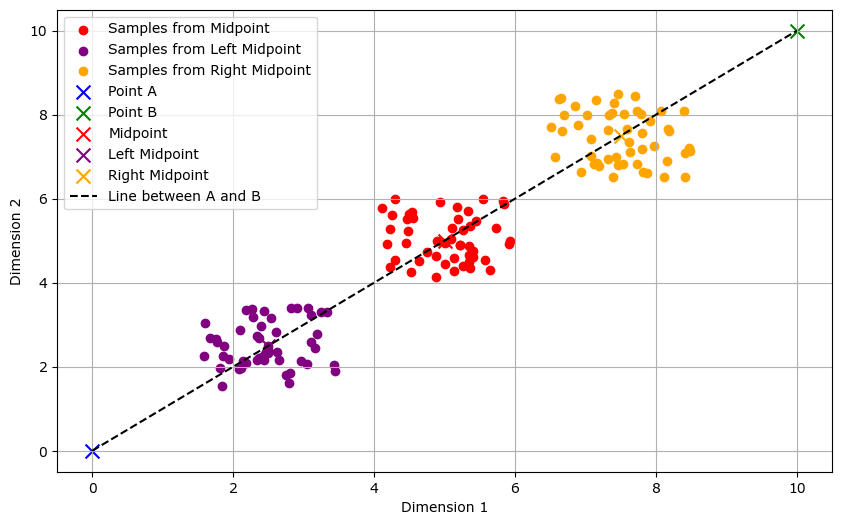

In [4]:
show(r=1 , degree=1,density=50)

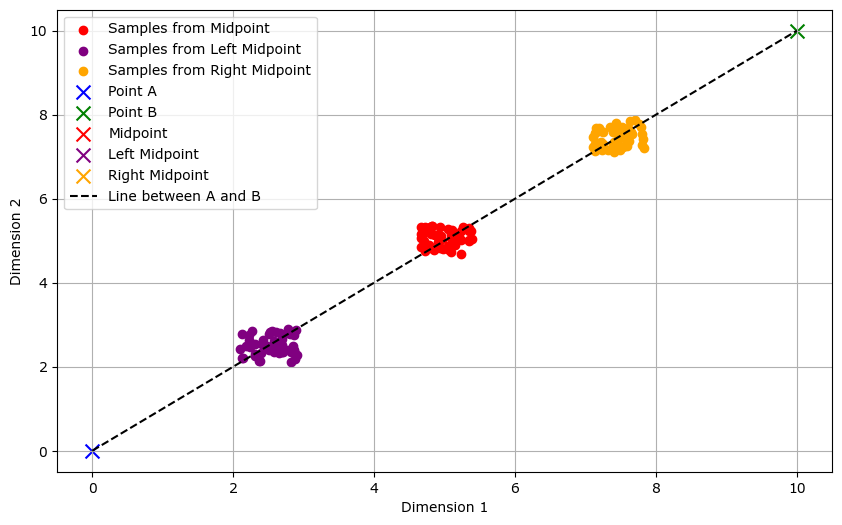

In [5]:
show(r=1,degree=0.4,density=50)

# how method 2 generate synthetic samples

In [7]:
import numpy as np
import matplotlib.pyplot as plt



def sample_cylinder_2d_fixed(N, A, B, r):
    """
    Generates N random points inside a 2D cylinder (rectangle with circular cross-section).
    Fixed version to handle type conversion issues.
    """
    # Convert A and B to float for safe operations
    A = A.astype(np.float64)
    B = B.astype(np.float64)

    # Compute the axis direction (unit vector)
    axis_direction = B - A
    axis_direction /= np.linalg.norm(axis_direction)  # Normalize

    # Generate random positions along the cylinder's axis
    t = np.random.rand(N, 1)  # Random interpolation factor (0 to 1)
    axis_positions = A + t * (B - A)  # Random points along AB

    # Generate random perpendicular displacement vectors
    random_directions = np.random.randn(N, 2)  # Random normal distribution
    random_directions -= (random_directions @ axis_direction)[:, None] * axis_direction  # Remove parallel component
    random_directions /= np.linalg.norm(random_directions, axis=1, keepdims=True)  # Normalize

    # Generate random radii (uniform in area)
    random_radii = r * np.sqrt(np.random.rand(N, 1))  # sqrt ensures uniform distribution inside the disk

    # Compute final displacement
    displacement = random_directions * random_radii

    # Compute final points inside the cylinder
    points = axis_positions + displacement

    return points

# Generate samples inside the 2D cylinder with fixed function
def plot(N,r):
    A = np.array([0, 0])
    B = np.array([5, 5])
    samples_2d_fixed = sample_cylinder_2d_fixed(# Define parameters
    N,
    A,  # First point on the axis
    B , # Second point on the axis
    r 
    )
    
    # Plot the sampled points
    plt.figure(figsize=(6, 6))
    plt.scatter(samples_2d_fixed[:, 0], samples_2d_fixed[:, 1], s=10, alpha=0.5, label="Sampled Points")
    plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=2, label="Cylinder Axis (AB)")
    plt.legend()
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis("equal")
    plt.show()

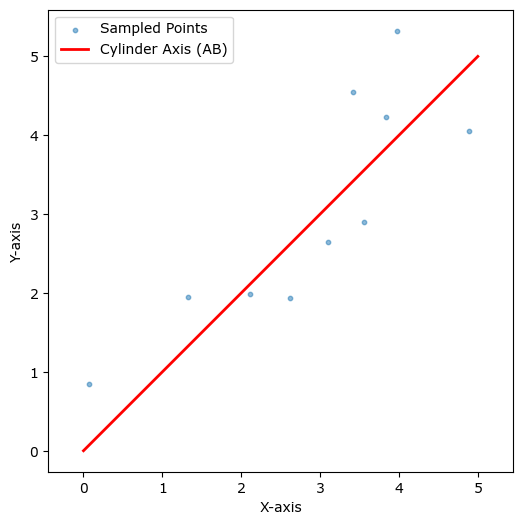

In [8]:
plot(10,1)

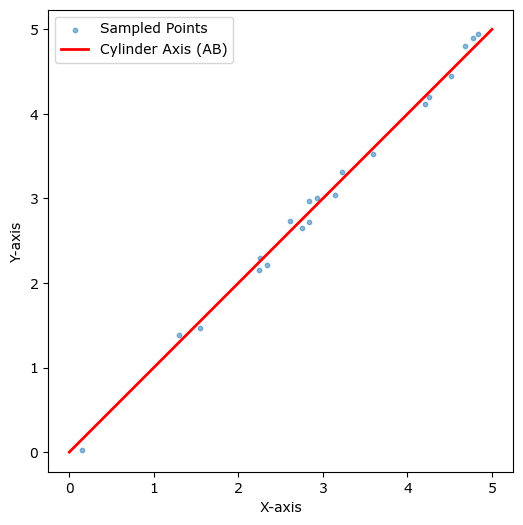

In [9]:
plot(20,0.1)